# Data Science
## Author: Tyler Baylson
### Table of Contents:
* [Intro to Data Visualization](#Intro-to-Data-Visualization)
* [Machine Learning](#Machine-Learning)
    * [Usain Bolt Dataset](#Usain-Bolt-Dataset)
        * [Usain Bolt Models](#Usain-Bolt-Models)
            * [Linear Regression](#Linear-Regression)
            * [Polynomial Regression](#Polynomial-Regression)
    * [California Housing Dataset](#California-Housing-Dataset)
    * [Online New Popularity Dataset](#Online-News-Popularity-Dataset)
        * [Cleaning/Modifying the Data](#Cleaning/Modifying-the-Data)
        * [Online News Popularity Models](#Online-News-Popularity-Models)
            * [Decision Tree Regressor](#Decision-Tree-Regressor)
            * [K-Nearest Neighbors Regressor](#K-Nearest-Neighbors-Regressor)
            * [Random Forest Classifier (w/ RandomizedSearchCV)](#Random-Forest-Classifier-(w/-RandomizedSearchCV))
            * [K-Nearest Neighbors Classifier (w/ RandomizedSearchCV)](#K-Nearest-Neighbors-Classifier-(w/-RandomizedSearchCV))
            * [Voting Classifier](#Voting-Classifier)
        * [Time Complexity](#Time-Complexity)
    * [Wine Dataset](#Wine-Dataset)
        * [Wine Models](#Wine-Models)
            * [Random Forest Classifier (w/ GridSearchCV)](#Random-Forest-Classifier-(w/-GridSearchCV))
            * [K-Nearest Neighbors Classifier (w/ GridSearchCV)](#K-Nearest-Neighbors-Classifier-(w/-GridSearchCV))
    * [Drawn Digits Dataset](#Drawn-Digits-Dataset)
* [References & Acknowledgments](#References-&-Acknowledgments)

In [98]:
# Graphical Output
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Mathematical Algorithms & Utilities
import pandas as pd
import numpy as np
import time

# Datasets
bolt_df = pd.read_csv("week03/bolt_data.csv")
news_df = pd.read_csv('project1/OnlineNewsPopularity.csv')
wine_df = pd.read_csv('project3/winequality-red.csv')

from sklearn.datasets import load_digits
digits_dataset = load_digits(return_X_y= True, as_frame= True)

# Feature Selection, Preprocessing, Model Selection, & Pipelining
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear Regression
from sklearn.linear_model import LinearRegression

# Decision Tree & Ensemble Classifiers
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeRegressor

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier


# Machine Learning

## Usain Bolt Dataset

In [99]:
bolt_df["time"] = bolt_df["time"].values.reshape(-1, 1)
bolt_df.head()

,time,position
0,0.00,0
1,1.85,10
2,2.87,20
3,3.78,30
4,4.65,40


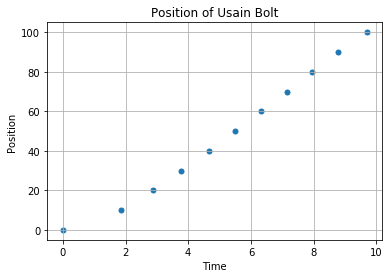

In [100]:
plt.scatter(bolt_df['time'], bolt_df['position'], marker= ".", s= 100)

plt.title("Position of Usain Bolt")
plt.xlabel("Time")
plt.ylabel("Position")
plt.grid(True)
plt.show()

### Usain Bolt Models

### Linear Regression

In [105]:
lm = LinearRegression(fit_intercept= False)
bolt_time = bolt_df['time'].values.reshape(-1,1)
lm.fit(bolt_time, bolt_df['position'])

print("r^2 score: " + str(lm.score(bolt_time, bolt_df['position'])))
pos_pred = lm.predict(bolt_time)

r^2 score: 0.9750622685773869


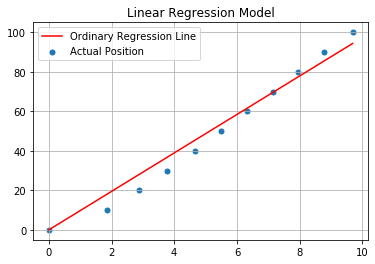

In [106]:
# Original data
plt.scatter(bolt_df['time'], bolt_df['position'], marker= ".", s= 100, label= "Actual Position")

# Predicted data
plt.plot(bolt_df['time'], pos_pred, color= "red", label= "Ordinary Regression Line")

plt.title("Linear Regression Model")
plt.grid(True)
plt.legend()
plt.show()

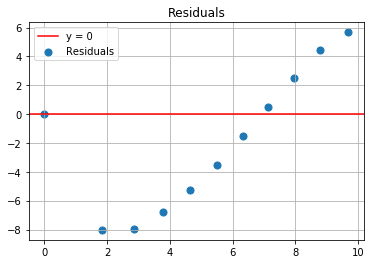

In [107]:
# Residuals Plot, we want this to appear as random noise
pos_residuals = bolt_df['position'] - pos_pred

plt.scatter(bolt_df['time'], pos_residuals, s= 50, label= "Residuals")

plt.title("Residuals")
plt.axhline(y= 0, color= "red", label= "y = 0")
plt.grid(True)
plt.legend()
plt.show()

### Polynomial Regression

In [110]:
cubic = 3
poly_features = PolynomialFeatures(degree= cubic, include_bias= False)
poly_model = LinearRegression()
# Use L_Regress(fit_intercept= False) to force .predict(0) == 0, ie: At time 0, position is 0

poly_pipeline = make_pipeline(poly_features, poly_model)
poly_pipeline.fit(bolt_time, bolt_df['position'])
poly_pipeline_pred = poly_pipeline.predict(bolt_time)
print("r^2 score: " + str(poly_pipeline.score(bolt_time, bolt_df['position'])))

r^2 score: 0.9998621069077964


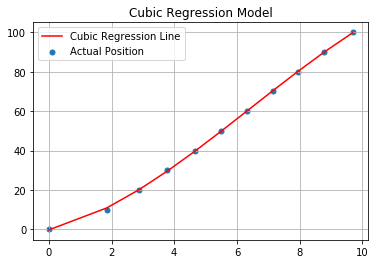

In [111]:
# Original data
plt.scatter(bolt_df['time'], bolt_df['position'], marker= ".", s= 100, label= "Actual Position")

# Predicted data
plt.plot(bolt_df['time'], poly_pipeline_pred, color= "red", label= "Cubic Regression Line")

plt.title("Cubic Regression Model")
plt.grid(True)
plt.legend()
plt.show()

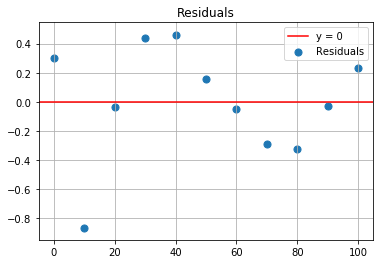

In [112]:
# Residuals Plot, we want this to appear as random noise
poly_residuals = bolt_df['position'] - poly_pipeline_pred

plt.scatter(bolt_df['position'], poly_residuals, s= 50, label= "Residuals")

plt.title("Residuals")
plt.axhline(y= 0, color= "red", label= "y = 0")
plt.grid(True)
plt.legend()
plt.show()

## California Housing Dataset

## Online News Popularity Dataset

In [59]:
news_df.rename(columns= {' shares':'shares'}, inplace=True)
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


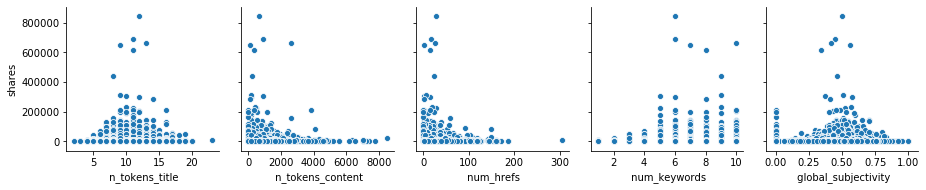

In [60]:
sns.pairplot(news_df,
             x_vars= [news_df.columns[2], news_df.columns[3], news_df.columns[7], news_df.columns[12], news_df.columns[44]],
             y_vars= 'shares')

In [61]:
percentile = np.percentile(np.array(news_df['shares']), q=95)
news_df_below_95 = (news_df[news_df['shares'] < percentile])

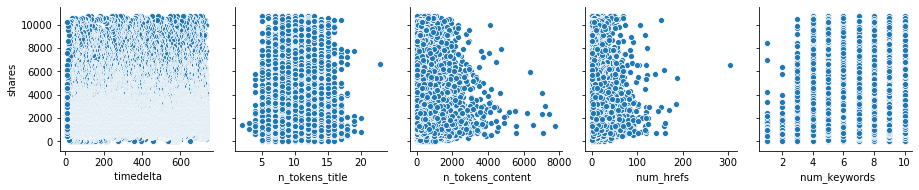

In [62]:
sns.pairplot(news_df_below_95,
             x_vars= [news_df.columns[1],news_df.columns[2],news_df.columns[3],news_df.columns[7],news_df.columns[12]],
             y_vars= 'shares')

In [63]:
news_df_95_sum = news_df_below_95.groupby(news_df.columns[18]).mean()
news_df_95_sum.reset_index(inplace=True)
news_df_95_sum.head()

fig = px.bar(news_df_95_sum,
            x= news_df_95_sum.columns[0],
            y= 'shares',
            text= 'shares',
            template= 'plotly_dark')

fig.update_xaxes(showgrid=False, 
                 title_text='World Data Channel',
                )

fig.update_yaxes(showgrid=False,
                 title_text='Average Shares')

fig.update_traces(textposition='auto', 
                    texttemplate='%{text:.3s}' 
                 )

fig.show()

In [64]:
news_df_95_sum = news_df_below_95.groupby(news_df.columns[38]).mean()
news_df_95_sum.reset_index(inplace=True)
news_df_95_sum.head()

fig = px.bar(news_df_95_sum,
            x= news_df_95_sum.columns[0],
            y= 'shares',
            text= 'shares',
            template= 'plotly_dark')

fig.update_xaxes(showgrid=False, 
                 title_text='Is Weekend',
                )

fig.update_yaxes(showgrid=False,
                 title_text='Average Shares')

fig.update_traces(textposition='auto', 
                    texttemplate='%{text:.3s}' 
                 )

fig.show()

In [65]:
news_df_95_sum = news_df_below_95.groupby(news_df.columns[12]).mean()
news_df_95_sum.reset_index(inplace=True)
news_df_95_sum.head()

fig = px.bar(news_df_95_sum,
            x= news_df_95_sum.columns[0],
            y= 'shares',
            text= 'shares',
            template= 'plotly_dark')

fig.update_xaxes(showgrid=False, 
                 title_text='Number of Keywords',
                )

fig.update_yaxes(showgrid=False,
                 title_text='Average Shares')

fig.update_traces(textposition='auto', 
                    texttemplate='%{text:.3s}' 
                 )

fig.show()

### Cleaning/Modifying the Data

In [66]:
def test_model(X: object, y: object, pipeline: object) -> None:
    """
    Receives a DataFrame of features, an array of a target variable, and a pipeline for a model. 
    Splits the data, fits the split data according to the model, prints scores, and displays a 
    residuals graph for the model.
    
    Args:
        X: A pandas DataFrame 
        y: A pandas Series
        pipeline: A sklearn pipeline containing information about a model
    
    Returns:
        None
    """
    # Split the data
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size= 0.7)
    
    # Fit and score
    pipeline.fit(X_trn, y_trn)
    print("Model Score on Training Data: " + str(pipeline.score(X_trn, y_trn)))
    print("Model Score on Testing Data: " + str(pipeline.score(X_tst, y_tst)))

    # Plot residuals
    tst_pred = pipeline.predict(X_tst)
    residuals = y_tst - tst_pred
    
    sns.scatterplot(x= tst_pred,
                    y= residuals,
                    alpha= .5)

    plt.xlabel("Actual Value")
    plt.ylabel("Residuals")
    plt.axhline(y= 0, color= "red", label= "y = 0")
    plt.legend()
    plt.show()
    return None

In [67]:
def score_decision_tree_with_levels(X, y, num_levels):
    """
    Creates, fits, and scores a decision tree based on a DataFrame of features, 
    a target array, and a specified number of levels.
    
    Args:
        X: A pandas DataFrame
        y: A pandas Series
        num_levels: The number of levels in the decision tree
        
    Returns:
        train_score: How the model scores on the training data
        test_score: How the model scores on the testing data
    """
    # Split the data
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size= 0.7)  
    
    # Create a decision tree, fit it, and score it
    DTR_num_levels = DecisionTreeRegressor(max_depth= num_levels)
    DTR_num_levels.fit(X_trn, y_trn)
    train_score = DTR_num_levels.score(X_trn, y_trn)
    test_score = DTR_num_levels.score(X_tst, y_tst)
    return train_score, test_score

In [68]:
# Drop non-numeric data
news_df.drop(columns= ["url", news_df.columns[1]], inplace= True)

# Split the data into features and a target
X = news_df.drop(columns= ['shares'])
y = news_df['shares']

# Create a standard scaler to scale features
ss = StandardScaler()
X_std = pd.DataFrame(ss.fit_transform(X), columns = X.columns.copy())

In [69]:
# Turning regression into classification. Split lower 95% into 0-19, 20-39, 40-59, 60-79, 80-100
percentile0 = np.percentile(np.array(news_df_below_95['shares']), q=0)
percentile25 = np.percentile(np.array(news_df_below_95['shares']), q=25)
percentile50 = np.percentile(np.array(news_df_below_95['shares']), q=50)
percentile75 = np.percentile(np.array(news_df_below_95['shares']), q=75)
percentile100 = np.percentile(np.array(news_df_below_95['shares']), q=100)


classif_df = news_df_below_95.copy()
bins = [percentile0, percentile25, percentile50, percentile75, percentile100]
categories = ['Very Unpopular', 'Somewhat Unpopular', 'Somewhat Popular', 'Very Popular']
classif_df['popularity'] = pd.cut(classif_df['shares'], bins, labels=categories)
classif_df.drop(columns= 'shares', inplace=True)
classif_df.dropna(inplace=True)
classif_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,Very Unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,Very Unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,Somewhat Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,Somewhat Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,Very Unpopular


### Online News Popularity Models

In [74]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X_std, y, train_size= 0.7)

### Decision Tree Regressor

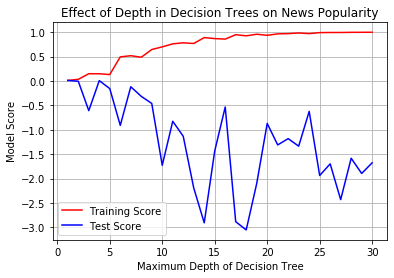

In [70]:
levels = 30
score_info = np.array([score_decision_tree_with_levels(X_std, y, n) for n in range(1, levels + 1)])

score_df = pd.DataFrame(data= score_info, columns= ["train_score", "test_score"], index = np.arange(1, levels + 1))
plt.plot(np.arange(1, levels + 1), score_df["train_score"], color= "red", label= "Training Score")
plt.plot(np.arange(1, levels + 1), score_df["test_score"], color= "blue", label= "Test Score")
plt.grid(True)
plt.title("Effect of Depth in Decision Trees on News Popularity")
plt.xlabel("Maximum Depth of Decision Tree")
plt.ylabel("Model Score")
plt.legend()
plt.show()

Model Score on Training Data: 0.6379750499551227
Model Score on Testing Data: -0.3782859741921474


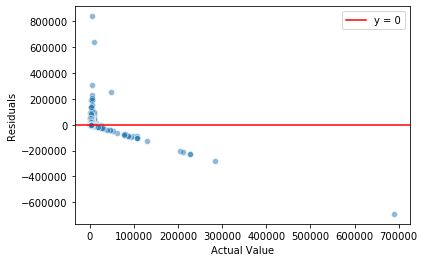

In [71]:
pipeline = make_pipeline(DecisionTreeRegressor(max_depth= 8))
test_model(X_std, y, pipeline)

### K-Nearest Neighbors Regressor

Model Score on Training Data: 1.0
Model Score on Testing Data: 0.016168580413063904


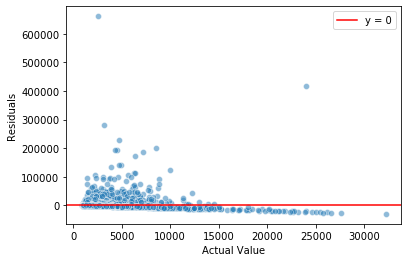

In [72]:
# Create a pipeline using SelectKBest and KNeighborsRegressor
selector = SelectKBest(score_func= f_regression, k= 23)
predictor = KNeighborsRegressor(n_neighbors= 43, weights= "distance")
pipeline = make_pipeline(selector, predictor)


test_model(X_std, y, pipeline)

### Random Forest Classifier (w/ RandomizedSearchCV)

In [ ]:
rfc_rs_cv = RandomizedSearchCV(RandomForestClassifier(), 
                               {'n_estimators': [100, 200, 300], 
                                'max_depth':[5, 10, 15]}, 
                               n_iter=9)
rfc_rs_cv.fit(X_trn, y_trn)
rfc_rs_cv_df = pd.DataFrame(rfc_rs_cv.cv_results_)

rfc = rfc_rs_cv.best_estimator_
rfc.fit(X_trn, y_trn)

print("Random Forest Classifier Training Score: " + str(rfc.score(X_trn, y_trn)))
print("Random Forest Classifier Testing Score: " + str(rfc.score(X_tst, y_tst)))

### K-Nearest Neighbors Classifier (w/ RandomizedSearchCV)

In [ ]:
knc_rs_cv = RandomizedSearchCV(KNeighborsClassifier(), 
                               {'n_neighbors': [5, 10, 15], 
                                'weights':['uniform', 'distance']}, 
                               n_iter=6)
knc_rs_cv.fit(X_trn, y_trn)
knc_rs_cv_df = pd.DataFrame(knc_rs_cv.cv_results_)

knc = knc_rs_cv.best_estimator_
knc.fit(X_trn, y_trn)

print("KNearest Neighbors Classifier Training Score: " + str(knc.score(X_trn, y_trn)))
print("KNearest Neighbors Classifier Testing Score: " + str(knc.score(X_tst, y_tst)))

### Voting Classifier

In [ ]:
voters = VotingClassifier([('forest', rfc), ('knearest', knc)])
voters.fit(X_trn, y_trn)

print("Voting Classifier Training Score: " + str(voters.score(X_trn, y_trn)))
print("Voting Classifier Testing Score: " + str(voters.score(X_tst, y_tst)))

### Time Complexity

In [76]:
def decision_tree_training_time(X: object, y: object, num_levels: int) -> float:
    """
    Tracks how long (in milliseconds) your computer takes to train a given training set on a 
    descision tree with num_levels levels.
    
    Args:
        X: A pandas DataFrame of features
        y: A pandas Series representing a target variable
        num_levels: The number of levels each decision tree should have
        
    Returns:
        The time it took for this function to complete
    """
    # time is recorded in seconds, convert to milliseconds at the end
    start_time = time.time()
    
    # Split the data
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size= 0.7)  
    
    # No scoring because we only care about time to run here
    DTR_num_levels = DecisionTreeRegressor(max_depth= num_levels)
    DTR_num_levels.fit(X_trn, y_trn)
    return (time.time() - start_time)*1000

In [ ]:
levels = 100
time_info = np.array([decision_tree_training_time(X_std, y, n) for n in range(1, levels + 1)])

time_df = pd.DataFrame(data= time_info, columns= ["milliseconds"], index = np.arange(1, levels + 1))

plt.plot(np.arange(1, levels + 1), time_df["milliseconds"], color= "red", label= "Time in Milliseconds")
plt.grid(True)
plt.title("Effect of Depth in Decision Trees on Time to Run")
plt.xlabel("Maximum Depth of Decision Tree")
plt.legend()
plt.show()

## Wine Dataset

In [78]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [79]:
wine_df.loc[7]

fixed acidity            7.3000
volatile acidity         0.6500
citric acid              0.0000
residual sugar           1.2000
chlorides                0.0650
free sulfur dioxide     15.0000
total sulfur dioxide    21.0000
density                  0.9946
pH                       3.3900
sulphates                0.4700
alcohol                 10.0000
quality                  7.0000
Name: 7, dtype: float64

In [80]:
quality_cut_off = 6
bins = [0, quality_cut_off, 10]
categories = ["Bad", "Good"]

wine_quality_df = wine_df.copy()
wine_quality_df['quality_classif'] = pd.cut(wine_df['quality'], bins, labels=categories)
wine_quality_df.drop(columns= 'quality', inplace=True)
wine_quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_classif
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


In [81]:
wine_quality_df.loc[7]

fixed acidity              7.3
volatile acidity          0.65
citric acid                  0
residual sugar             1.2
chlorides                0.065
free sulfur dioxide         15
total sulfur dioxide        21
density                 0.9946
pH                        3.39
sulphates                 0.47
alcohol                     10
quality_classif           Good
Name: 7, dtype: object

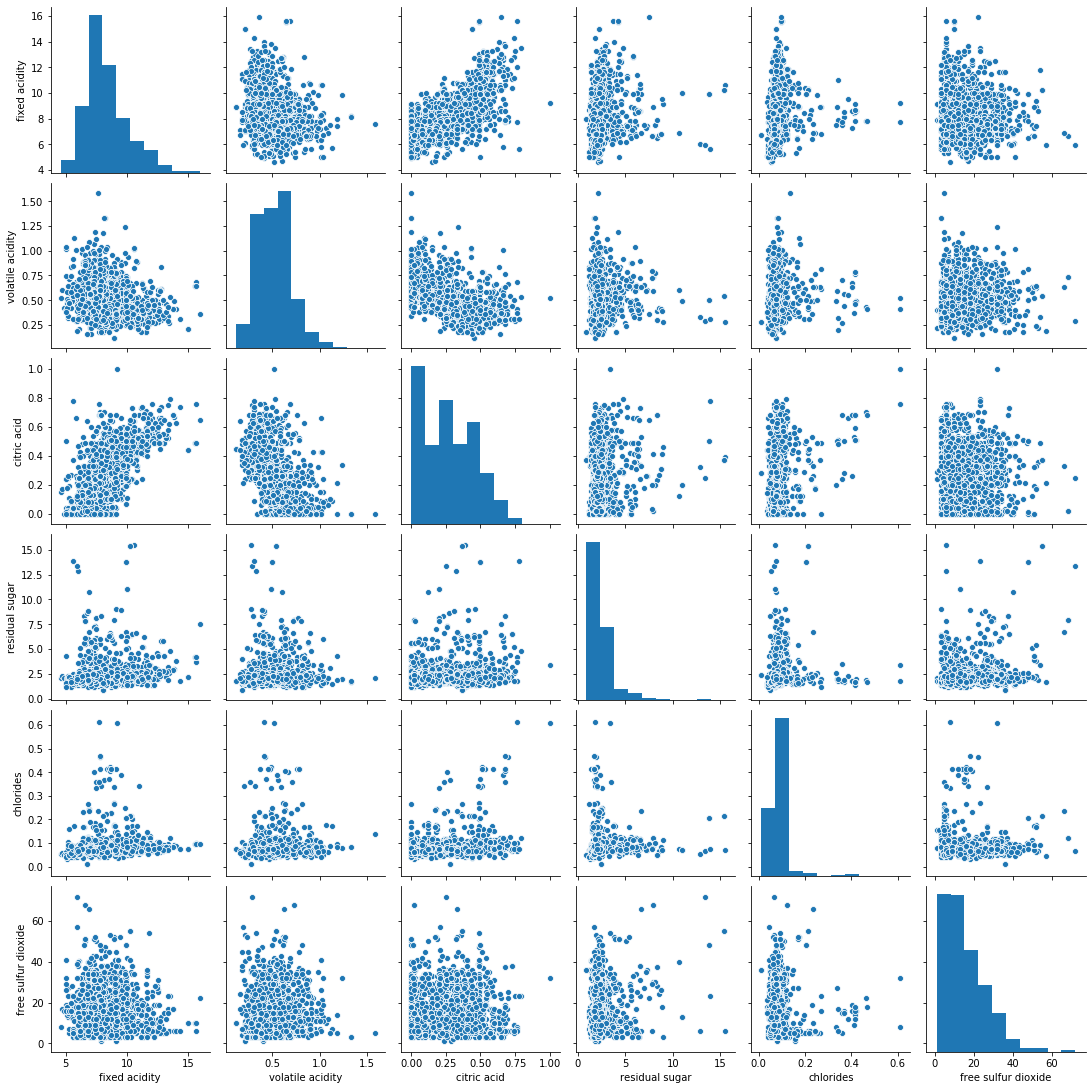

In [82]:
sns.pairplot(wine_quality_df,
            x_vars= [wine_quality_df.columns[0], wine_quality_df.columns[1], wine_quality_df.columns[2], 
                    wine_quality_df.columns[3], wine_quality_df.columns[4], wine_quality_df.columns[5]],
            y_vars= [wine_quality_df.columns[0], wine_quality_df.columns[1], wine_quality_df.columns[2], 
                    wine_quality_df.columns[3], wine_quality_df.columns[4], wine_quality_df.columns[5]])

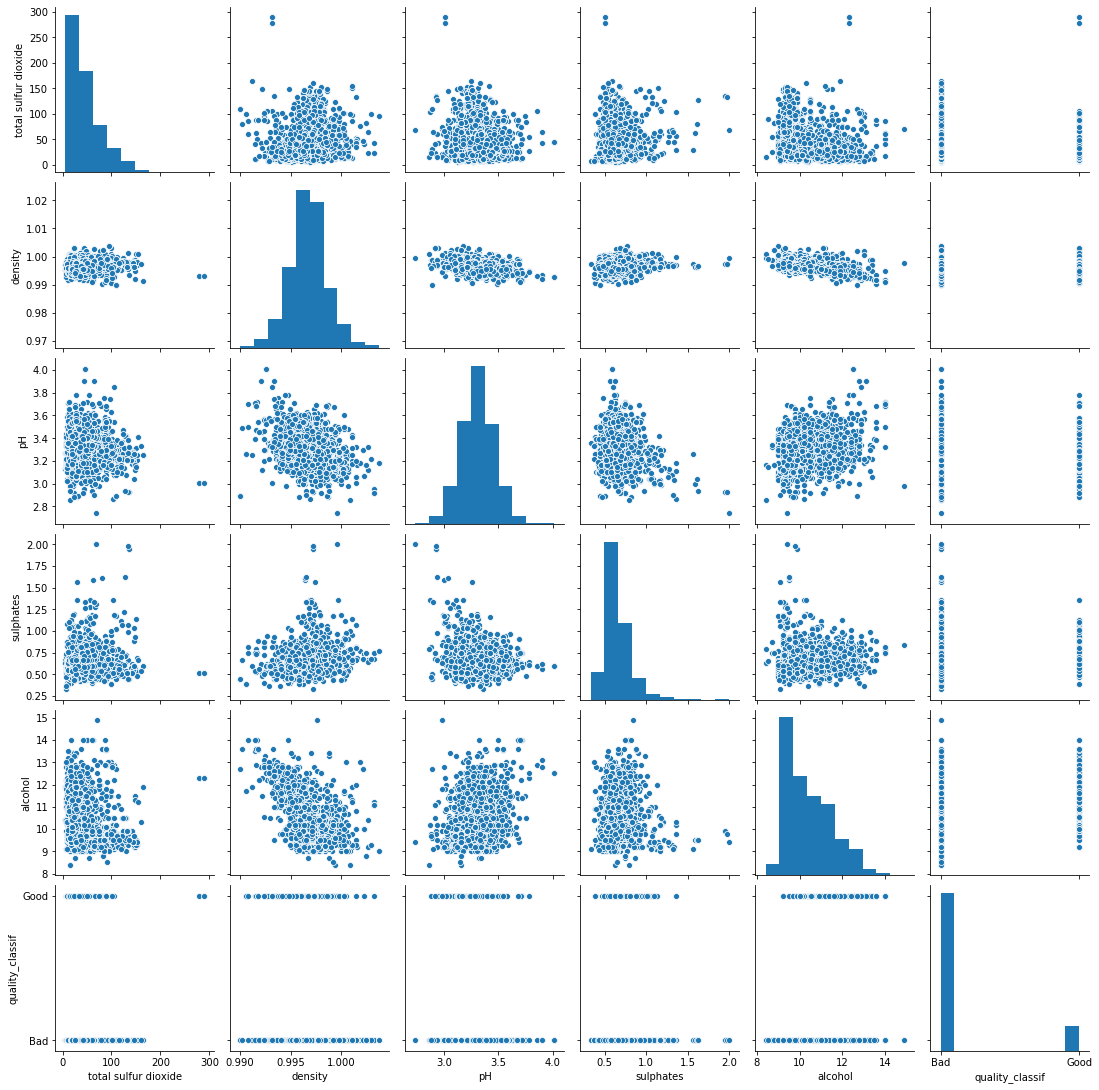

In [83]:
sns.pairplot(wine_quality_df,
            x_vars= [wine_quality_df.columns[6], wine_quality_df.columns[7], wine_quality_df.columns[8], 
                    wine_quality_df.columns[9], wine_quality_df.columns[10], wine_quality_df.columns[11]],
            y_vars= [wine_quality_df.columns[6], wine_quality_df.columns[7], wine_quality_df.columns[8], 
                    wine_quality_df.columns[9], wine_quality_df.columns[10], wine_quality_df.columns[11]])

In [84]:
wine_count_df = wine_quality_df.groupby('quality_classif').mean()
wine_count_df.reset_index(inplace=True)

In [85]:
fig = px.bar(wine_count_df,
            x= 'quality_classif',
            y= 'pH',
            text= 'pH',
            template= 'plotly_dark',
            width= 400,
            height= 300)

fig.update_xaxes(showgrid=False, 
                 title_text='Quality',
                )

fig.update_yaxes(showgrid=False,
                 title_text='Mean pH')

fig.update_traces(textposition='auto', 
                    texttemplate='%{text:.3s}' 
                 )

fig.show()

In [86]:
fig = px.bar(wine_count_df,
            x= 'quality_classif',
            y= 'total sulfur dioxide',
            text= 'total sulfur dioxide',
            template= 'plotly_dark',
            width= 400,
            height= 300)

fig.update_xaxes(showgrid=False, 
                 title_text='Quality',
                )

fig.update_yaxes(showgrid=False,
                 title_text='Mean Total Sulfur Dioxide')

fig.update_traces(textposition='auto', 
                    texttemplate='%{text:.3s}' 
                 )

fig.show()

In [87]:
fig = px.bar(wine_count_df,
            x= 'quality_classif',
            y= 'chlorides',
            text= 'chlorides',
            template= 'plotly_dark',
            width= 400,
            height= 300)

fig.update_xaxes(showgrid=False, 
                 title_text='Quality',
                )

fig.update_yaxes(showgrid=False,
                 title_text='Mean Chlorides')

fig.update_traces(textposition='auto', 
                    texttemplate='%{text:.3f}' 
                 )

fig.show()

### Wine Models

In [88]:
# Split the data into features and a target
X = wine_quality_df.drop(columns= 'quality_classif')
y = wine_quality_df['quality_classif']

# Create a standard scaler to scale features
ss = StandardScaler()
X_std = pd.DataFrame(ss.fit_transform(X), columns = X.columns.copy())

X_trn, X_tst, y_trn, y_tst = train_test_split(X_std, y, train_size= 0.7)

### Random Forest Classifier (w/ GridSearchCV)

In [89]:
rfc_gs_cv = GridSearchCV(RandomForestClassifier(),
                         {"n_estimators": [100, 200, 300],
                         "max_depth":[n for n in range(1, 31)]}, 
                         return_train_score=False)

rfc_gs_cv.fit(X_trn, y_trn)

rfc = rfc_gs_cv.best_estimator_
rfc.fit(X_trn, y_trn)

print("Random Forest Classifier Training Score: " + str(rfc.score(X_trn, y_trn)))
print("Random Forest Classifier Testing Score: " + str(rfc.score(X_tst, y_tst)))

Random Forest Classifier Training Score: 1.0
Random Forest Classifier Testing Score: 0.9104166666666667


### K-Nearest Neighbors Classifier (w/ GridSearchCV)

In [90]:
knc_gs_cv = GridSearchCV(KNeighborsClassifier(),
                         {"n_neighbors": [n for n in range(1, 101)],
                         "weights": ["uniform", "distance"]}, 
                         return_train_score=False)

knc_gs_cv.fit(X_trn, y_trn)

knc = knc_gs_cv.best_estimator_
knc.fit(X_trn, y_trn)

print("KNearest Neighbors Classifier Training Score: " + str(knc.score(X_trn, y_trn)))
print("KNearest Neighbors Classifier Testing Score: " + str(knc.score(X_tst, y_tst)))

KNearest Neighbors Classifier Training Score: 1.0
KNearest Neighbors Classifier Testing Score: 0.9208333333333333


## Drawn Digits Dataset

<Figure size 432x288 with 0 Axes>

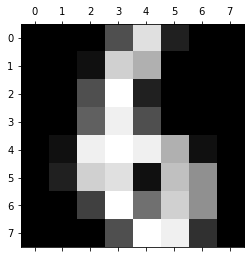

The above image is a drawing of the number: 6


In [91]:
example = load_digits()
plt.gray()
plt.matshow(example.images[34])
plt.show()
print("The above image is a drawing of the number: " + str(example.target[34]))

In [92]:
digits_w_o_targets_df = pd.DataFrame(digits_dataset[0])
digits_w_o_targets_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [93]:
target_df = pd.DataFrame(digits_dataset[1])
target_df

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [94]:
digits_df = digits_w_o_targets_df.join(target_df)
randomized_digits_df = digits_df.sample(frac=1)
randomized_digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1057,0.0,2.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,2.0,12.0,16.0,16.0,7.0,0.0,0.0,8
653,0.0,0.0,4.0,10.0,16.0,16.0,7.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,7
733,0.0,0.0,0.0,2.0,14.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,4
634,0.0,0.0,5.0,9.0,13.0,16.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,14.0,0.0,0.0,0.0,0.0,7
1125,0.0,1.0,12.0,16.0,13.0,7.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,10.0,10.0,13.0,14.0,1.0,0.0,3


## Drawn Digits Models

In [95]:
# Model performs better without scaling X
X = randomized_digits_df.drop(columns= 'target')

# DataConversionWarning was happening. The warning suggested using .ravel(), so I did
y = (np.array(randomized_digits_df['target'])).ravel()

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size= 0.7)

### Neural Network (w/ GridSearchCV)

In [96]:
mlp_gs_cv = GridSearchCV(MLPClassifier(),
                         {"hidden_layer_sizes": [(100,), (150, 100, 50)],
                          "activation": ['identity', 'logistic', 'tanh', 'relu'],
                          "solver": ['lbfgs', 'adam'],
                          "learning_rate": ['constant', 'invscaling'],
                          "max_iter": [5000]})

mlp_gs_cv.fit(X_trn, y_trn)
mlp_gs_cv_df = pd.DataFrame(mlp_gs_cv.cv_results_)
mlp_gs_cv_df.sort_values("rank_test_score", ascending= False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.930739,0.162852,0.004228,0.000234,logistic,"(150, 100, 50)",invscaling,5000,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.908730,0.900794,0.912351,0.904382,0.868526,0.898957,0.015708,32
12,0.937084,0.136091,0.003774,0.000674,logistic,"(150, 100, 50)",constant,5000,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.912698,0.904762,0.936255,0.928287,0.860558,0.908512,0.026427,31
7,0.693554,0.115849,0.002594,0.000080,identity,"(150, 100, 50)",invscaling,5000,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.884921,0.936508,0.932271,0.964143,0.948207,0.933210,0.026553,30
5,0.864091,0.392842,0.002534,0.000064,identity,"(150, 100, 50)",constant,5000,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.936508,0.936508,0.948207,0.964143,0.900398,0.937153,0.020988,29
1,0.985773,0.208605,0.002082,0.000254,identity,"(100,)",constant,5000,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.920635,0.924603,0.956175,0.960159,0.940239,0.940362,0.015997,28


In [97]:
mlp = mlp_gs_cv.best_estimator_
mlp.fit(X_trn, y_trn)

print("Multi-Layer Perceptron Classifier Training Score: " + str(mlp.score(X_trn, y_trn)))
print("Multi-Layer Perceptron Classifier Testing Score: " + str(mlp.score(X_tst, y_tst)))

Multi-Layer Perceptron Classifier Training Score: 1.0
Multi-Layer Perceptron Classifier Testing Score: 0.9907407407407407


# References & Acknowledgments
* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
* Waskom, M. and the seaborn development team (2020). mwaskom/seaborn [https://doi.org/10.5281/zenodo.592845]. Zendo.

-------------------------------------------------------------------------------
* https://blog.softhints.com/map-numeric-data-bins-categories-pandas/
    * Learning about bins
* https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
    * Figuring out hidden_layer_sizes
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
    * Documentation for MLPClassifier
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
    * Documentation for sklearn's digits dataset